In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('EURUSD-30.csv')
data.head()

,DateTime,Time,Open,MA20,CurClose,Vol,NextClose
0,2022.08.22 21:00:00,210,0.9927,0.9967,0.9932,1907,0.9933
1,2022.08.22 21:30:00,2130,0.9932,0.9964,0.9933,1945,0.9944
2,2022.08.22 22:00:00,220,0.9933,0.9962,0.9944,1652,0.9942
3,2022.08.22 22:30:00,2230,0.9944,0.9960,0.9942,1967,0.9943
4,2022.08.22 23:00:00,230,0.9942,0.9959,0.9943,930,0.9941


In [67]:
data_x = data.filter(['MA20', 'Open', 'CurClose'], axis='columns')
data_y = data.filter(['NextClose'], axis='columns')

In [68]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, random_state=False, shuffle=False, test_size=.3)
print("X_train: ", X_train.shape, ", y_train: ", y_train.shape, ", X_test: ", X_test.shape, ", y_test: ", y_test.shape)

X_train:  (1400, 3) , y_train:  (1400, 1) , X_test:  (600, 3) , y_test:  (600, 1)


In [69]:
y_train, y_test = np.array(y_train), np.array(y_test)

In [70]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
print("Model coef: ", model.coef_, " --- Model Intercept: ", model.intercept_)

Model coef:  [[-0.00099883  0.04931564  0.94838082]]  --- Model Intercept:  [0.00326698]


In [71]:
model.score(X_test, y_test)

0.9797230161847078

In [72]:
y_pred = model.predict(X_test)

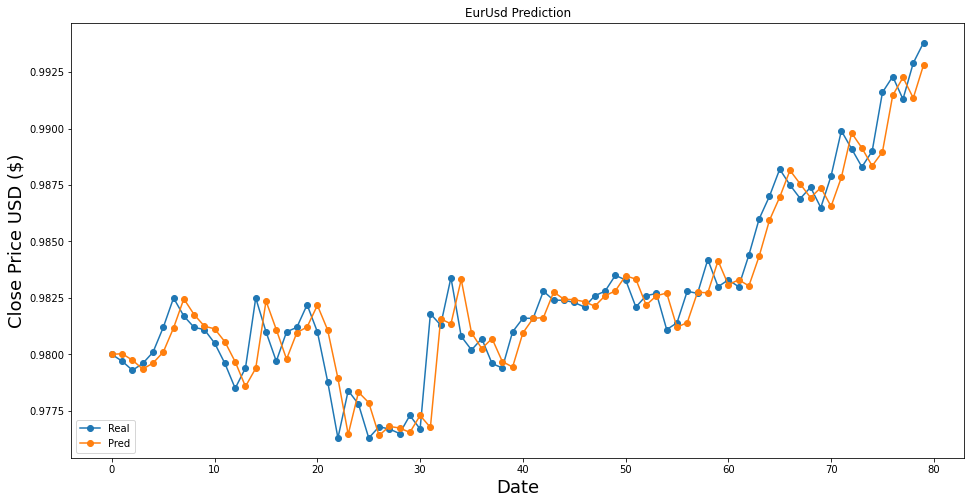

In [84]:
plt.figure(figsize=(16,8))
plt.title('EurUsd Prediction')
plt.plot(y_test[0:80], marker='o')
plt.plot(y_pred[0:80], marker='o')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend(['Real', 'Pred'], loc='lower left')
plt.show()

In [ ]:
y_curr = {'MA20':[0.9750], 'Open':[0.9774], 'CurClose':[0.9782]}
y = pd.DataFrame(y_curr)
y

In [ ]:
prediction = model.predict(y)
print('Next Close: ', round(prediction[0][0], 4))

In [74]:
rmse = np.sqrt(np.mean(y_pred - y_test)**2)
rmse

3.4120850671086054e-05

In [ ]:
# CurClose => e=3.6392 & s=0.9796
# Open => e=6.7775 & s=0.9627
# MA20, CurClose => e=3.04 & s=0.9796
# Open, CurClose => e=3.3539 & s=0.9797
# CurClose, Vol => e=3.7275 & s=0.9796
# Open, CurClose, Vol => e=3.4301 & s=0.9797
# MA20, Open, CurClose => e=3.4120 & s=0.9797
# MA20, Open, CurClose, Vol => e=3.4990 & s=0.9797